In [1]:
import os
import re
import matplotlib
import imageio
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import signal
import numpy as np 
import pandas as pd
import seaborn as sns
plt.style.use('seaborn-darkgrid')

In [2]:
files1 = {os.path.splitext(k)[0]: {} for k in os.listdir('data') if '.csv' in os.path.splitext(k)[1]}
files2 = {os.path.splitext(k)[0]: {} for k in os.listdir('data/FCandFRECS') if '.csv' in os.path.splitext(k)[1]}


for i,file in enumerate(os.listdir('data')):
    ext = os.path.splitext(file)[1]
    name = os.path.splitext(file)[0]
    if '.csv' in ext:
        df = pd.read_csv(f'data/{file}')
        files1[name] = df

for i,file in enumerate(os.listdir('data/FCandFRECS')):
    ext = os.path.splitext(file)[1]
    name = os.path.splitext(file)[0]
    if '.csv' in ext:
        df = pd.read_csv(f'data/FCandFRECS/{file}')
        files2[name] = df

print(files1.keys())
amps=np.array(files1['Amps']['amp'])
Xa=np.array(files1['Amps']['X'])
Ya=np.array(files1['Amps']['Y'])
f22=np.array(files1['22']['frecs'])
X22=np.array(files1['22']['X'])
Y22=np.array(files1['22']['Y'])


print(files2.keys())
f=np.array(files2['0']['frecs'])
X=[]
Y=[]
for i in range(10):
    X.append(np.array(files2['{}'.format(i)]['X']))
    Y.append(np.array(files2['{}'.format(i)]['Y']))

dict_keys(['14', '22', '25', '27', '28', '29', 'Amps', 'Error22'])
dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])


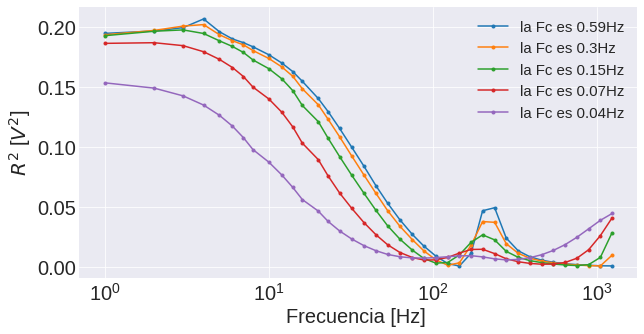

In [4]:
%matplotlib inline
plt.figure(figsize=(10,5))
for i in range(5):
    plt.semilogx(f,X[5+i]**2+Y[5+i]**2,'.-',label=f'la Fc es {np.round(fc(25+i),2)}Hz')
    
plt.ylabel(r'$R^2$ [$V^2$]',fontsize=20)
plt.xlabel(r'Frecuencia [Hz] ',fontsize=20)
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)
plt.legend(fontsize=15)


0.0001409833686238926
7.701076680532992e-05
0.00010926530890745245


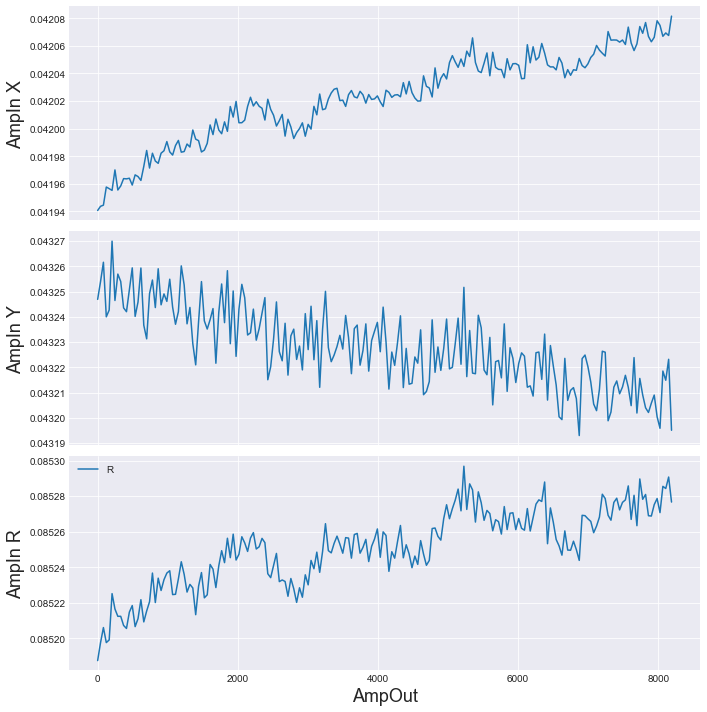

In [4]:
%matplotlib inline
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(10,10),sharex=True)
ax1.plot(amps,Xa**2,label='EEE')
ax2.plot(amps,Ya**2,label='Careta')
ax3.plot(amps,Xa**2+Ya**2,label='R')
ax1.set_ylabel('AmpIn X',fontsize=18)
ax2.set_ylabel('AmpIn Y',fontsize=18)
ax3.set_ylabel('AmpIn R',fontsize=18)
ax3.set_xlabel('AmpOut',fontsize=18)
fig.tight_layout()
plt.legend()
print(max(Xa**2)-min(Xa**2))
print(max(Ya**2)-min(Ya**2))
print(max(Xa**2+Ya**2)-min(Xa**2+Ya**2))

In [5]:
f22=np.array(files1['22']['frecs'])
X22=np.array(files1['22']['X'])
Y22=np.array(files1['22']['Y'])

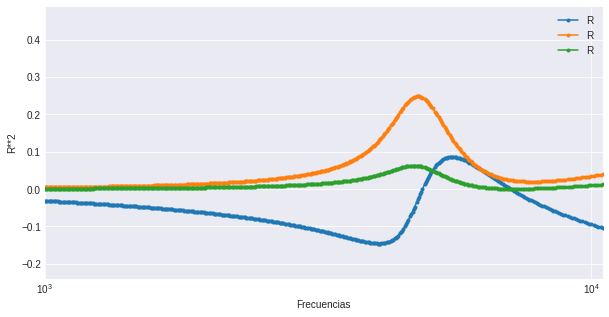

In [7]:
%matplotlib inline

plt.figure(figsize=(10,5))
plt.semilogx(1/( (f22+1) * 120 * 8e-9 ),Y22,'.-',label='R')
plt.semilogx(1/( (f22+1) * 120 * 8e-9 ),X22,'.-',label='R')
plt.semilogx(1/( (f22+1) * 120 * 8e-9 ),X22**2+Y22**2,'.-',label='R')
plt.xlabel('Frecuencias')
plt.ylabel('R**2')
plt.xlim(1000,10500)

plt.legend()

In [6]:
fe=np.array(files1['Error22']['frecs'])
Xe=np.array(files1['Error22']['X'])
Ye=np.array(files1['Error22']['Y'])
Re=np.array(files1['Error22']['R'])
ph=np.array(files1['Error22']['ph'])

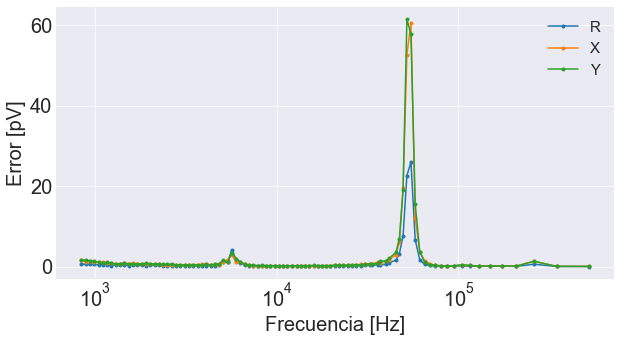

In [11]:
%matplotlib inline
plt.figure(figsize=(10,5))
plt.semilogx(1/( (fe+1) * 120 * 8e-9 ) ,(10**12)*Re**2,'.-',label='R')
plt.semilogx(1/( (fe+1) * 120 * 8e-9 ),(10**12)*Xe**2,'.-',label='X')
plt.semilogx(1/( (fe+1) * 120 * 8e-9 ),(10**12)*Ye**2,'.-',label='Y')
plt.xlabel('Frecuencia [Hz]',fontsize=20)
plt.ylabel('Error [pV]',fontsize=20)
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)
plt.legend(fontsize=15)

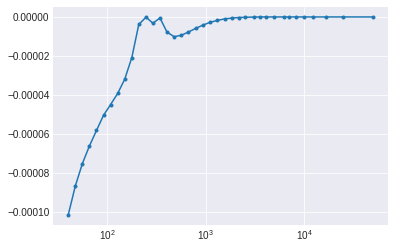

In [10]:
plt.semilogx(1e9/(f*2520*8),X[2],'.-',label='{}'.format(20+2))

In [12]:
def hz(frec):
    hz_ = 1/( (frec+1) * 120 * 8*10**-9 )
    return hz_

def vars_(df):
    X = np.array(df['X']) #* 1000
    Y = np.array(df['Y']) #* 1000
    R = np.sqrt(X**2 + Y**2)
    T = np.arctan(Y/X)
    return X,Y,R,T

def fc(frec):
    hz_ =  1/(2 * np.pi * (2 ** frec ) * 8 )*10**9
    return hz_

files1.keys()





dict_keys(['14', '22', '25', '27', '28', '29', 'Amps', 'Error22'])

In [12]:
a = [1,2,3]
b = [1,2,3]
c = [1,2,3]
d = []
d.append(a)
d.append(b)
d.append(c)
print(np.mean(d))

2.0


(0, 0.07)

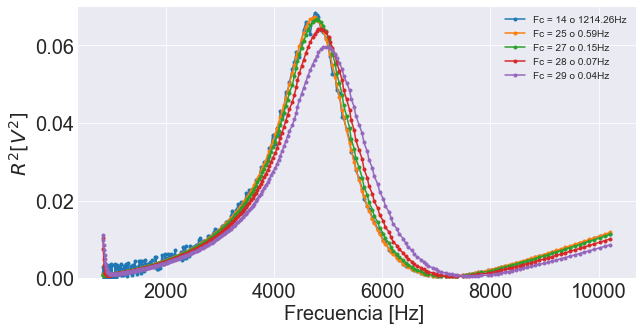

In [13]:

%matplotlib inline
plt.figure(figsize=(10,5))

files = ['14', '25', '27', '28', '29']
ys = []
for file in files:
    x,y,r,t = vars_(files1[file]) 
    frec = hz(files1[file]['frecs'])
    if file != '14':
        ys.append(y)
    #r = r[0:len(r)-50]
    #frec = frec[0:len(frec)-50]

    plt.plot(frec,r**2,'.-',label=f'Fc = {file} o {np.round(fc(int(file)),2)}Hz')
    #plt.plot(frec,y,'.-',label=f'Fc ={np.round(fc(int(file)),2)}Hz')
    plt.ylabel(r'$R^2 [V^2]$',fontsize=20)
    plt.xlabel(r'Frecuencia [Hz] ',fontsize=20)
    plt.tick_params(axis="x", labelsize=20)
    plt.tick_params(axis="y", labelsize=20)
    plt.legend(fontsize=10)
    #plt.title(f"Circuito RLC",fontsize=20)
#plt.xlim([150,500])
plt.ylim([0,0.07])


In [66]:
len(y_mean)

297

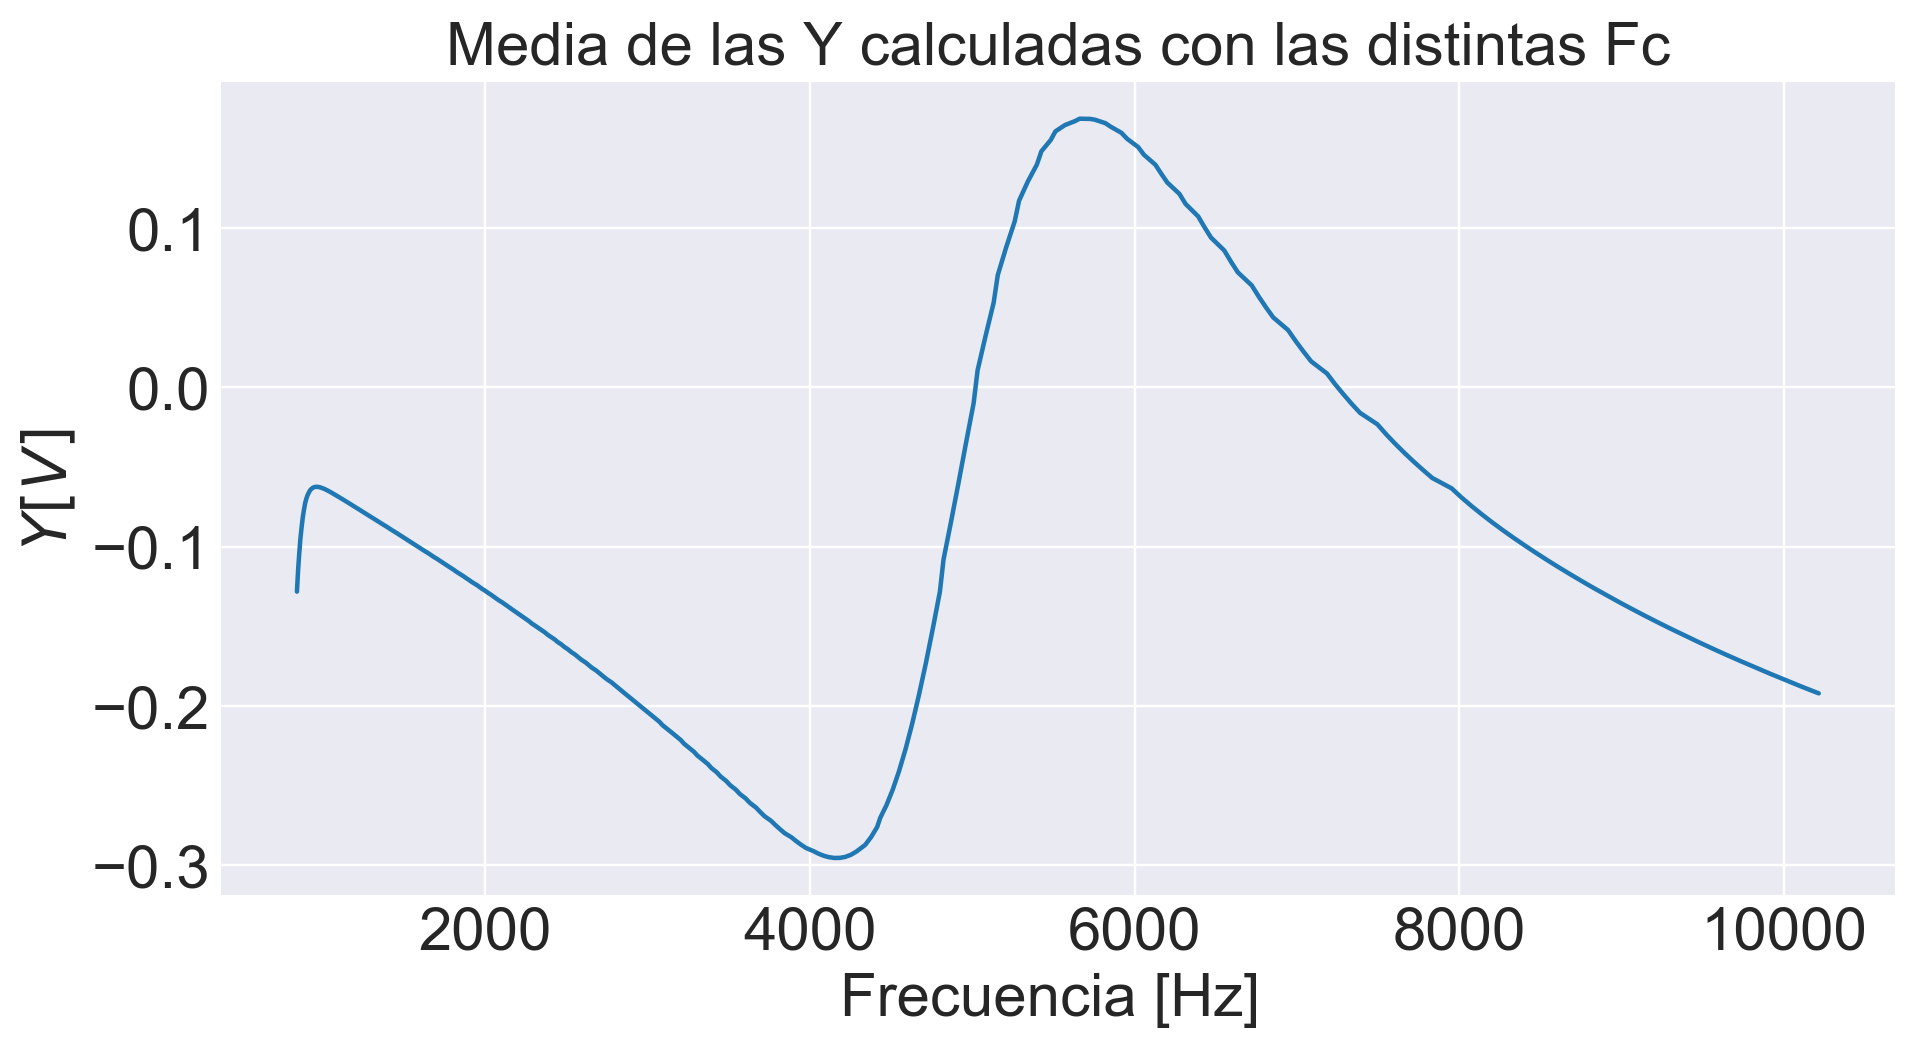

In [14]:
yst = np.transpose(np.array(ys)) 
y_mean = []
for y in yst:
    y_m = np.mean(y)
    y_mean.append(y_m)
y_mean=np.array(y_mean)
%matplotlib qt
plt.figure(figsize=(10,5))
plt.plot(frec,y_mean*2)
plt.ylabel(r'$Y [V]$',fontsize=20)
plt.xlabel(r'Frecuencia [Hz] ',fontsize=20)
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)
#plt.legend(fontsize=10)
plt.title(f"Media de las Y calculadas con las distintas Fc",fontsize=20)
peaks = plt.ginput(2)    
    

In [15]:
a = peaks[0][0]
b = peaks[1][0]
b-a
b

5655.897592822033

In [16]:
44721.3595499958/(2*np.pi) - 31622.7766016838/(2*np.pi)

2084.704223723067

Covariance of coefficients:
[[ 4.10384669e-06 -3.17626123e-01 -1.54054737e+03 -1.56532287e+03]
 [-3.17626123e-01  2.45833633e+04  1.19234008e+08  1.21151561e+08]
 [-1.54054737e+03  1.19234008e+08  5.78307716e+11  5.87608216e+11]
 [-1.56532287e+03  1.21151561e+08  5.87608216e+11  5.97058290e+11]]
C0: 1.1442138946217713e-07
L: 0.008855891702256998
R: 42.95277176294292
R2: 43.6435447867827


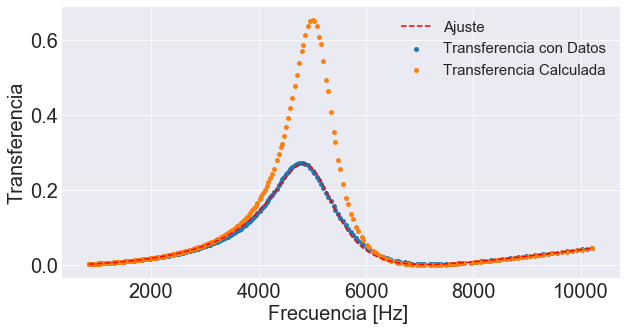

31414.506590040408


In [19]:
%matplotlib inline
from scipy.optimize import curve_fit
x,y,r,t = vars_(files1['27']) 
frec = hz(files1[file]['frecs'])
r=2.02*r
#r = r[0:len(r)-50]
#frec = frec[0:len(frec)-50]

def transf(frec,C0,L,R,R2):
    w = frec * np.pi * 2
    A = C0**2*R2**2*w**2*(C0**2*L**2*w**4 + C0**2*R**2*w**2 - 4*C0*L*w**2 + 4)
    B = (C0**4*L**2*R2**2*w**6 + C0**4*R**2*R2**2*w**4 - 4*C0**3*L*R2**2*w**4 + C0**2*L**2*w**4 + C0**2*R**2*w**2 + 2*C0**2*R*R2*w**2 + 4*C0**2*R2**2*w**2 - 2*C0*L*w**2 + 1)
    func = A/B
    return func


L=10 * 10**-3
C0= 100 *10**-9 
R = 12
R2 = 50

param, param_cov = curve_fit(transf,frec,r**2, p0=[C0,L,R,R2]) 
  
print("Covariance of coefficients:") 
print(param_cov) 
print(f'C0: {param[0]}')
print(f'L: {param[1]}')
print(f'R: {param[2]}')
print(f'R2: {param[3]}')

%matplotlib inline
plt.figure(figsize=(10,5))
plt.plot(frec,transf(frec,param[0],param[1],param[2],param[3]), '--', label ="Ajuste",color='red') 
plt.scatter(frec,r**2, s= 15, label ="Transferencia con Datos")
plt.scatter(frec,transf(frec,C0,L,R,R2), s= 15, label ="Transferencia Calculada")
plt.ylabel(r'Transferencia',fontsize=20)
plt.xlabel(r'Frecuencia [Hz] ',fontsize=20)
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)
plt.legend(fontsize=15)
plt.show()
print(1/np.sqrt(param[0]*param[1]))

In [52]:
def transf(frec):
    R = 12
    R2 = 50
    L=10 * 10**-3
    C0= 100 *10**-9
    w = frec * np.pi * 2
    A = C0**2*R2**2*w**2*(C0**2*L**2*w**4 + C0**2*R**2*w**2 - 4*C0*L*w**2 + 4)
    B = (C0**4*L**2*R2**2*w**6 + C0**4*R**2*R2**2*w**4 - 4*C0**3*L*R2**2*w**4 + C0**2*L**2*w**4 + C0**2*R**2*w**2 + 2*C0**2*R*R2*w**2 + 4*C0**2*R2**2*w**2 - 2*C0*L*w**2 + 1)
    func = A/B
    return func

plt.scatter(frec,transf(frec), s= 15, label ="Datos")

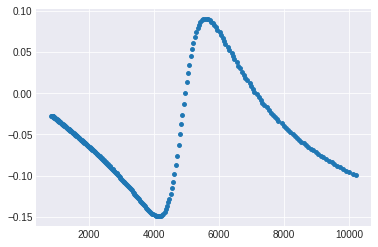

In [74]:

plt.scatter(frec,y, s= 15, label ="Datos")

In [23]:

5047.7
Q1 = 4999.8/1601.13 #datos
Q2 = 5047.7/2084.7 #calculado

In [24]:
Q1

3.1226696145846993

In [25]:
Q2

2.421307622199837